# Titanic Dataset Analysis

## Importing Libraries & Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

## Initial Exploration

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

**Shape**: `(891, 12)` → 891 passengers and 12 features.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Describe**:  
  - Average age ~ 29.7  
  - Average fare ~ 32.2 (but max = 512, highly skewed)  
  - Survival rate ~ 38% (only 342 survived).

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Missing Cells**:  
  - Age → 177 missing  
  - Cabin → 687 missing  
  - Embarked → 2 missing

## Data Cleaning and Preprocessing

#### Filling missing Age values with the median Age

In [8]:
median_age = train['Age'].median()
train['Age'] = train['Age'].fillna(median_age)

#### Filling missing Embarked values with the mode

In [9]:
mode_embarked = train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(mode_embarked)

#### Dropping the Cabin column due to a large number of missing values

In [10]:
train.drop('Cabin', axis=1, inplace=True)

### Verifying the changes

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Final dataset has **no missing values**.

In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Analysis

### Survival Distribution

In [14]:
train[['Survived']].value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

Only **342 survived** vs **549 died**.

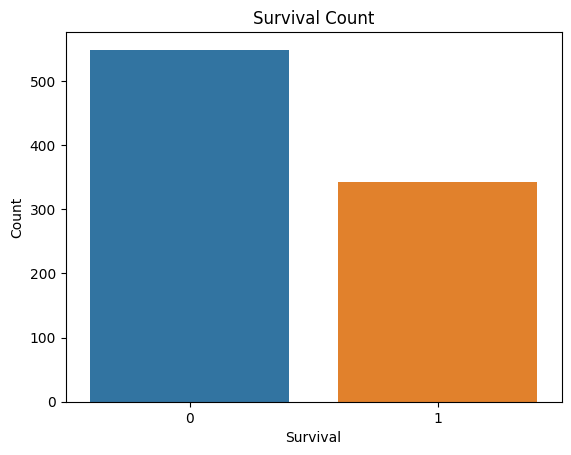

In [15]:
sns.countplot(x='Survived', data=train)
plt.title('Survival Count')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()

In [16]:
survival_rate=(train['Survived'].sum()/len(train))*100
print(f'The survival rate is {survival_rate:.2f}%')

The survival rate is 38.38%


### Passenger Class Analysis

In [17]:
train[['Pclass']].value_counts()

Pclass
3         491
1         216
2         184
Name: count, dtype: int64

Most passengers were in **3rd class**.

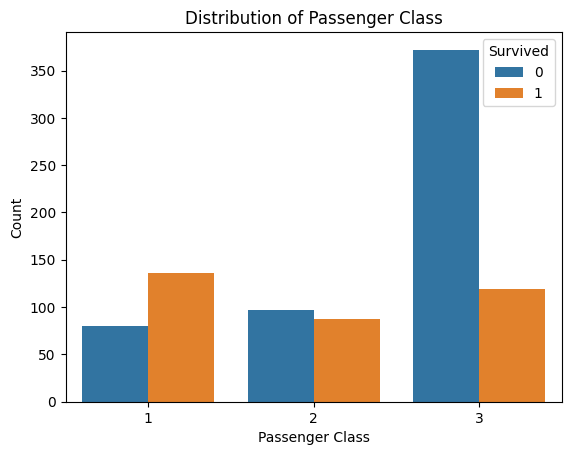

In [18]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Distribution of Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

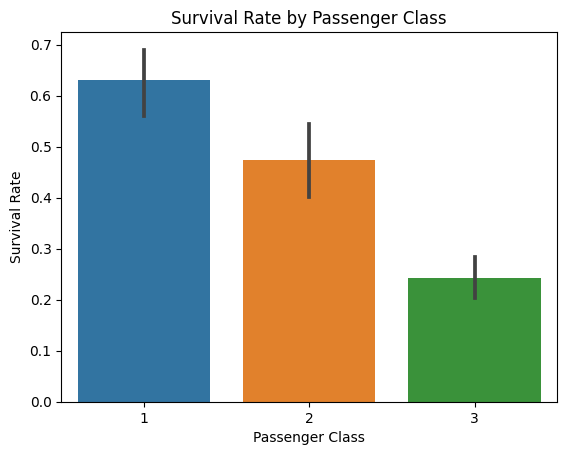

In [19]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

**Survival by Class**:  
  - 1st class → highest survival  
  - 3rd class → lowest survival  

Wealth/class strongly influenced chances of survival.

### Gender Analysis

In [20]:
train[['Sex']].value_counts()

Sex   
male      577
female    314
Name: count, dtype: int64

Count: 577 males, 314 females.

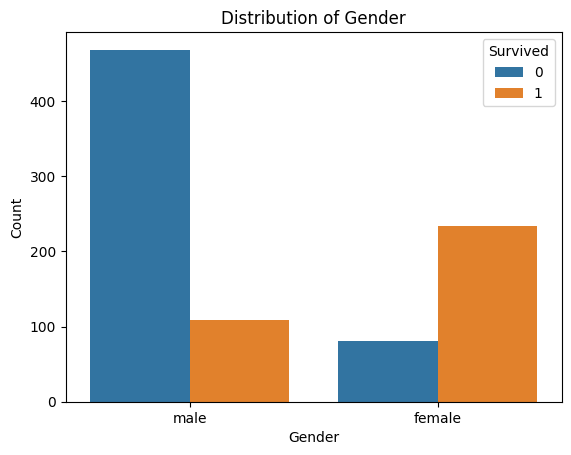

In [21]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

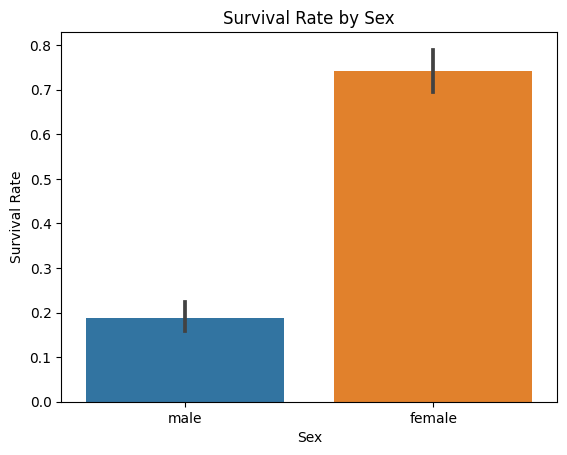

In [22]:
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

**Survival**:  
  - Women survived much more than men.  
  - Most men died.  

Confirms **“Women and children first” policy** during evacuation.

### Embarkation Port Analysis

Ports: Southampton (S), Cherbourg (C), Queenstown (Q).

In [23]:
train[['Embarked']].value_counts()

Embarked
S           646
C           168
Q            77
Name: count, dtype: int64

**Counts**: Majority from Southampton.

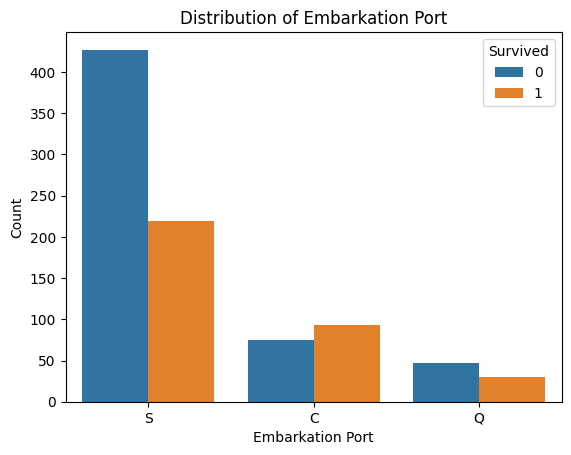

In [24]:
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.title('Distribution of Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.show()

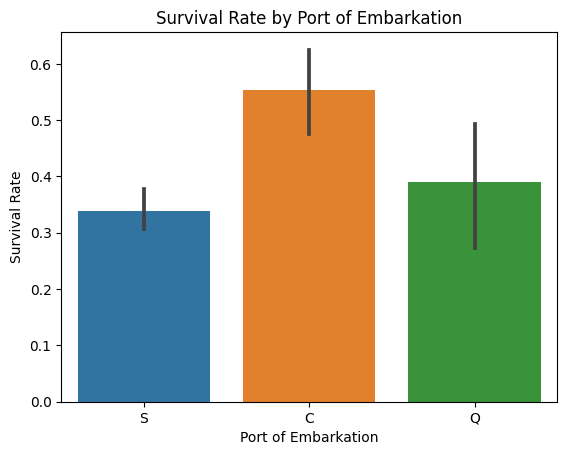

In [25]:
sns.barplot(x='Embarked', y='Survived', data=train)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

**Survival rates**:  
  - Cherbourg (C) → highest survival  
  - Southampton (S) → lowest survival  
  
Port of embarkation played a role in survival.

### Age Distribution

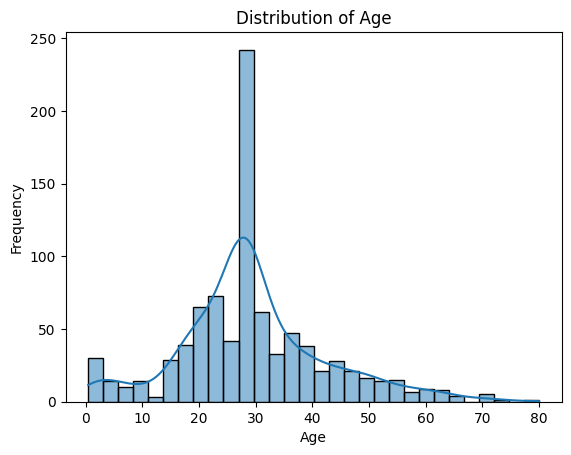

In [26]:
sns.histplot(train['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Histogram**: Most passengers between 20–40 years.

Text(0, 0.5, 'Age')

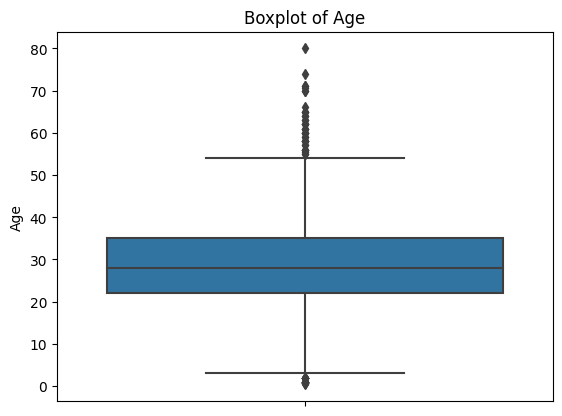

In [27]:
sns.boxplot(y='Age', data=train)
plt.title('Boxplot of Age')
plt.ylabel('Age')

**Boxplot**: Outliers include children and very old passengers.

Text(0.5, 0, 'Theoretical Quantiles')

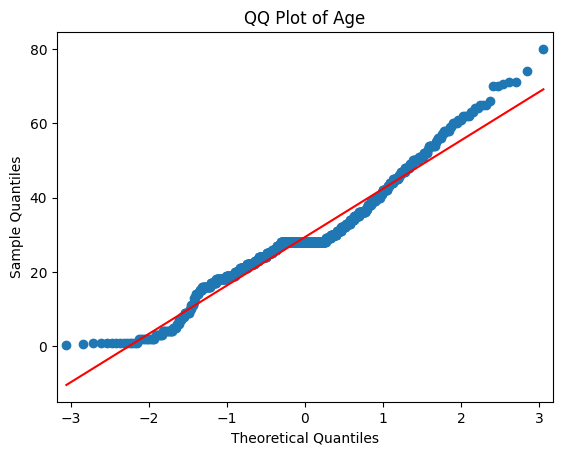

In [28]:
sm.qqplot(train['Age'], line='s')
plt.title('QQ Plot of Age')
plt.xlabel('Theoretical Quantiles')

**QQ plot**: Roughly normal distribution, but with heavy tails.

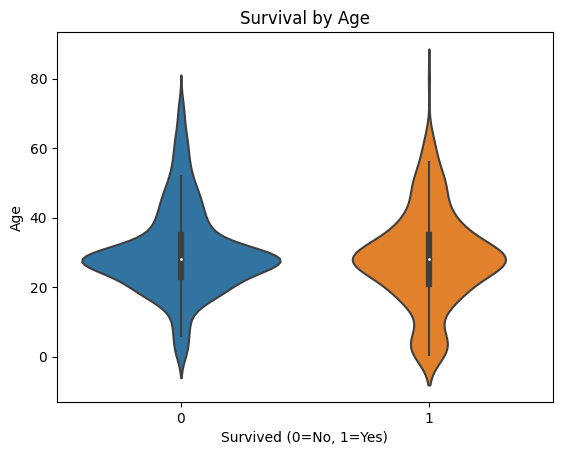

In [29]:
sns.violinplot(x='Survived', y='Age', data=train)
plt.title('Survival by Age')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

**Violin plot**:  
  - Children had higher survival probability.  
  - Older passengers had lower survival.

### Fare Distribution

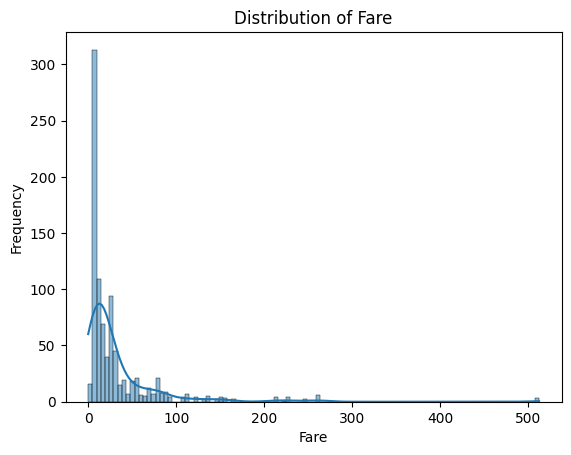

In [30]:
sns.histplot(train['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

**Histogram**: Strongly right-skewed. Most fares < 50.

Text(0, 0.5, 'Fare')

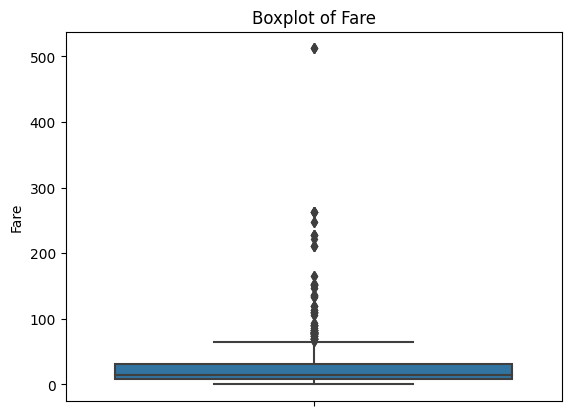

In [31]:
sns.boxplot(y='Fare', data=train)
plt.title('Boxplot of Fare')
plt.ylabel('Fare')

**Boxplot**: Outliers → very wealthy passengers.

Text(0.5, 0, 'Theoretical Quantiles')

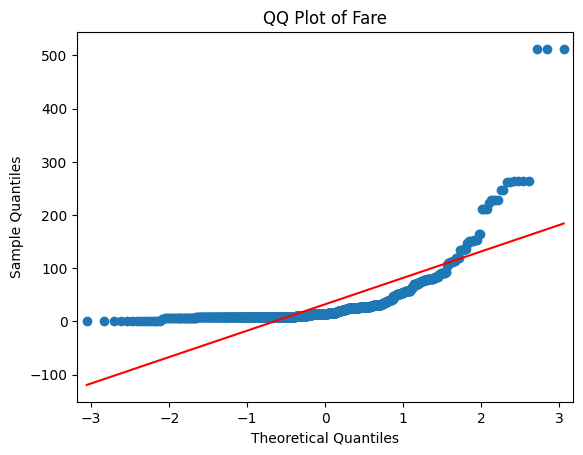

In [32]:
sm.qqplot(train['Fare'], line='s')
plt.title('QQ Plot of Fare')
plt.xlabel('Theoretical Quantiles')

**QQ plot**: Deviates heavily from normal due to skewness.

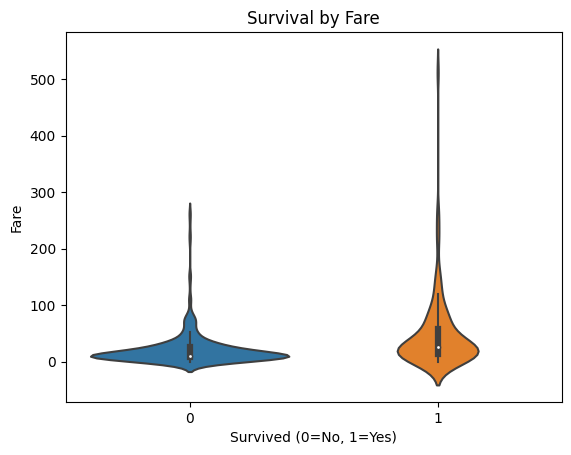

In [33]:
sns.violinplot(x='Survived', y='Fare', data=train)
plt.title('Survival by Fare')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Fare')
plt.show()

**Violin plot**:  
  - Higher fare → higher survival.  
  - Wealthier passengers had better chances.

#### Age vs Fare Scatter Plot (Survival)

Scatter plot shows how **Age** and **Fare** together relate to survival.

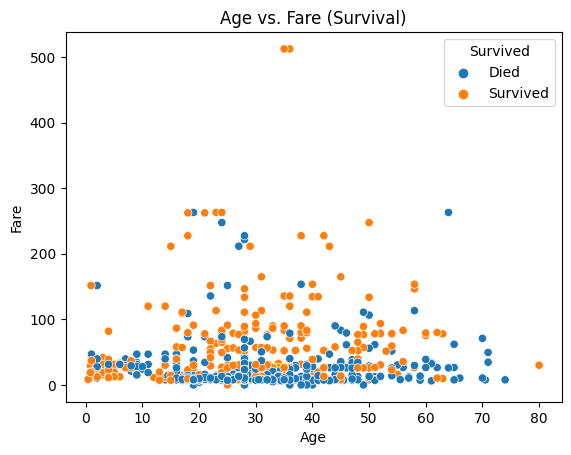

In [34]:
scatter_plot=sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train)
plt.title('Age vs. Fare (Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
handles, labels = scatter_plot.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Died', 'Survived'], title='Survived')

**Trends observed**:
  - Many passengers clustered at lower fares (<50) and ages between 20–40.
  - Younger passengers (especially children) survived more, even at lower fares.
  - Some very old passengers are visible, mostly with lower survival rates.

Conclusion: **Wealth (high fare) and youth (low age)** improved chances of survival.

## Pair Plot of Key Features

The pair plot allows us to visualize relationships between multiple numerical variables at once, while also distinguishing survival status.

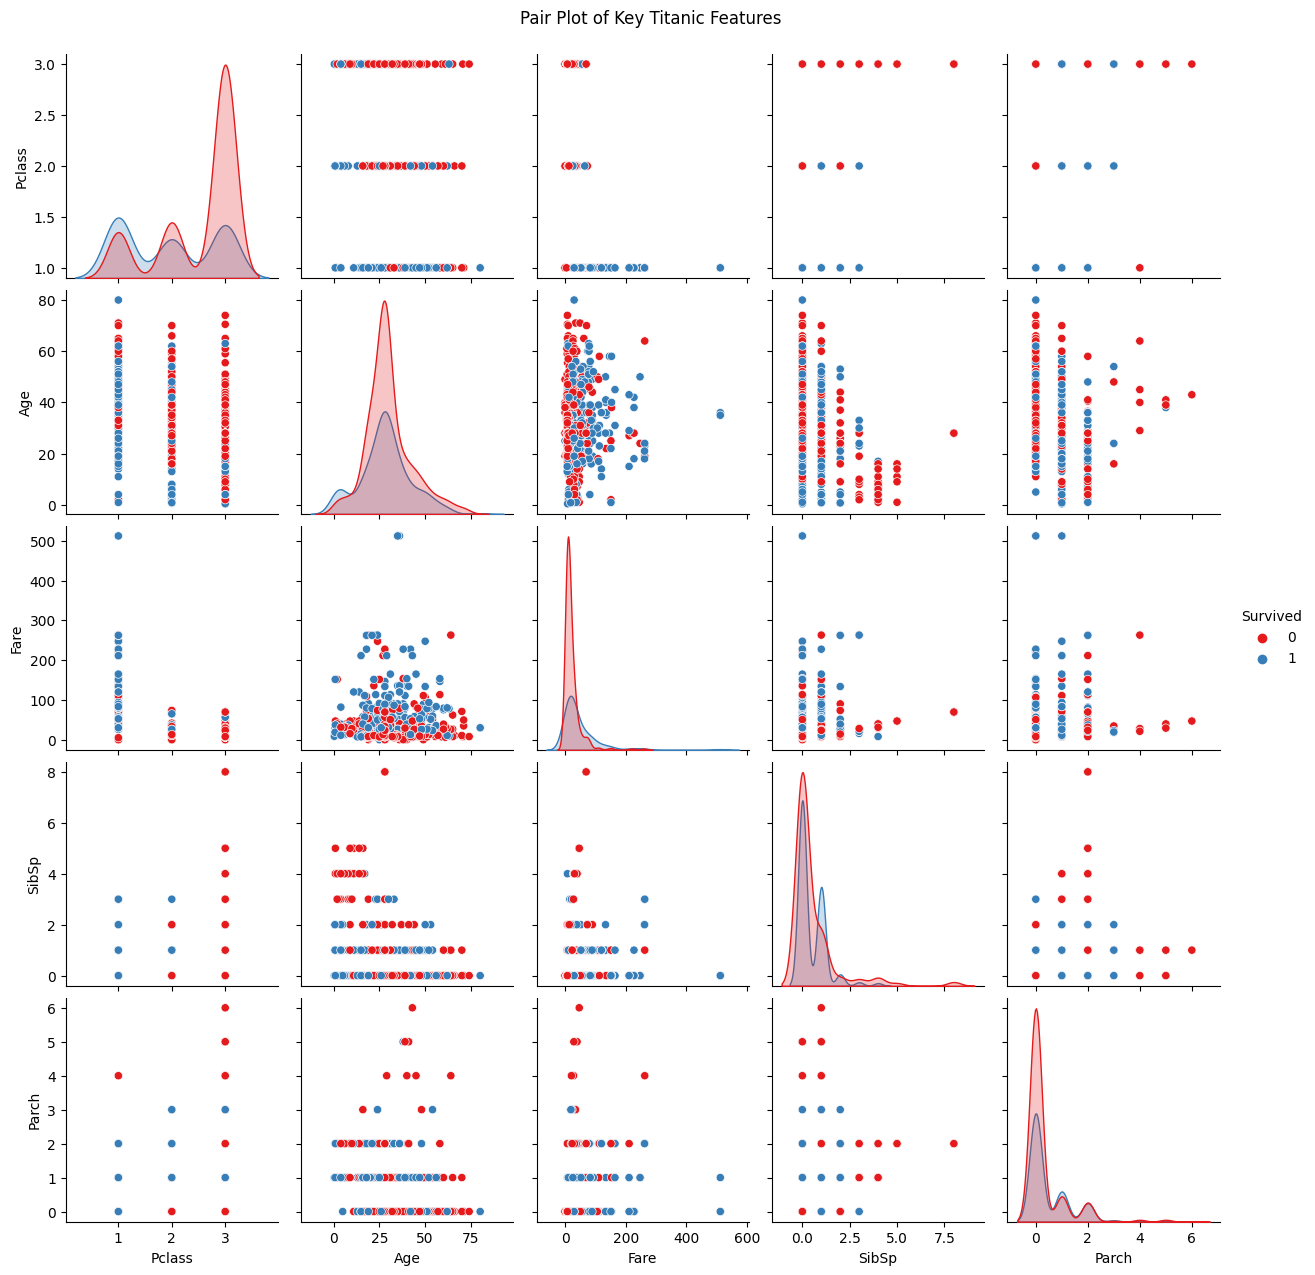

In [35]:
features = ["Survived", "Pclass", "Age", "Fare", "SibSp", "Parch"]

# Creating pairplot
sns.pairplot(train[features], hue="Survived", diag_kind="kde", palette="Set1")

plt.suptitle("Pair Plot of Key Titanic Features", y=1.02)
plt.show()

**Observations:**

- **Diagonal plots** (KDEs):  
  - Survived passengers (blue) show different distributions compared to non-survivors (red).  
  - For example, survivors are more concentrated in lower `Pclass` and higher `Fare`.  

- **Pclass vs Fare**:  
  - 1st-class passengers paid higher fares, and survival was more common among them.  
  - 3rd-class passengers (low fares) had poor survival chances.  

- **Age vs Fare**:  
  - Younger children and high-fare passengers had a better chance of survival.  
  - Many adult passengers with low fares did not survive.  

- **SibSp / Parch**:  
  - Most passengers had few or no relatives aboard.  
  - Larger families are rare and survival among them appears lower.


**Conclusion:**

- The pair plot visually confirms that **Sex, Class, Age, and Fare** are strong survival indicators.  
- Survivors cluster in **lower Pclass, higher Fare, and younger Age ranges**.

### Correlation Matrix Heatmap

A correlation matrix shows how numerical variables relate to each other.

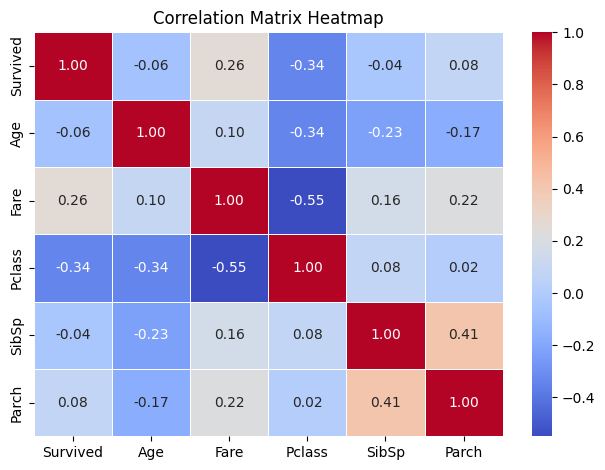

In [36]:
# Selecting only the numerical columns for the correlation matrix
numerical_df = train[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']]

# Calculating the correlation matrix
corr_matrix = numerical_df.corr()

# Creating the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

**Observations:**
  - **Survived** is **negatively correlated** with `Pclass` → higher class (lower Pclass number) = higher survival.
  - **Fare** is **positively correlated** with survival → passengers who paid higher fares had better chances.
  - `SibSp` and `Parch` show weak correlations with survival, but they are positively related to each other (both indicate family aboard).

**Conclusion:**
  - **Pclass and Fare** stand out as important survival indicators.

### Key Insights from the Data (Overall):
- Survival rate = **38%** only.  
- **Sex & Class** were the strongest predictors of survival.  
- **Women, children, and wealthy (1st class) passengers** had the highest chances.  
- Port of embarkation mattered → Cherbourg passengers fared better.  
- Higher fares & younger ages generally improved survival probability.

# Applying Machine Learning for Predictions

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

In [38]:
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(train, train[["Survived", "Pclass", "Sex"]]):
    strat_train_set=train.loc[train_indices]
    strat_test_set=train.loc[test_indices]

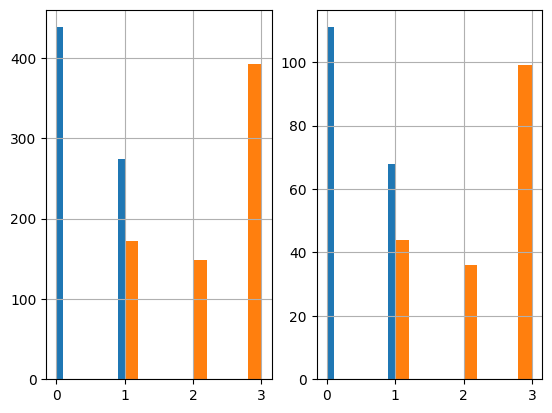

In [39]:
plt.subplot(1, 2, 1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1, 2, 2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

**Similar Distributions** for train and test data.

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

In [41]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X, y=None):
        encoder=OneHotEncoder()
        matrix=encoder.fit_transform(X[['Embarked']]).toarray()
        column_names=["C", "S", "Q"]
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]

        matrix=encoder.fit_transform(X[['Sex']]).toarray()
        column_names=["Female", "Male"]
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
            
        return X

In [42]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(['Name', 'Embarked', 'Sex', 'Ticket'], axis='columns', errors='ignore')

In [43]:
from sklearn.pipeline import Pipeline

pipeline=Pipeline([("featureencoder", FeatureEncoder()),
                  ("featuredropper", FeatureDropper())])

In [44]:
strat_train_set=pipeline.fit_transform(strat_train_set)

In [45]:
strat_train_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
405,406,0,2,34.0,1,0,21.0000,0.0,0.0,1.0,0.0,1.0
229,230,0,3,28.0,3,1,25.4667,0.0,0.0,1.0,1.0,0.0
850,851,0,3,4.0,4,2,31.2750,0.0,0.0,1.0,0.0,1.0
172,173,1,3,1.0,1,1,11.1333,0.0,0.0,1.0,1.0,0.0
486,487,1,1,35.0,1,0,90.0000,0.0,0.0,1.0,1.0,0.0


In [46]:
strat_train_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
C              0
S              0
Q              0
Female         0
Male           0
dtype: int64

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=strat_train_set.drop(['Survived'], axis=1)
y=strat_train_set['Survived']
X_data=scaler.fit_transform(X)
y_data=y.to_numpy()

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [49]:
clf=RandomForestClassifier()
param_grid=[
    {"n_estimators":[10, 100, 200, 1000], "max_depth":[None, 5, 10], "min_samples_split":[2,3,4]}
]

In [50]:
grid_search=GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 1000]}],
             return_train_score=True, scoring='accuracy')

In [51]:
final_clf=grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=200)

In [52]:
strat_test_set=pipeline.fit_transform(strat_test_set)

In [53]:
strat_test_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
728,729,0,2,25.0,1,0,26.0000,0.0,0.0,1.0,0.0,1.0
711,712,0,1,28.0,0,0,26.5500,0.0,0.0,1.0,0.0,1.0
506,507,1,2,33.0,0,2,26.0000,0.0,0.0,1.0,1.0,0.0
31,32,1,1,28.0,1,0,146.5208,1.0,0.0,0.0,1.0,0.0
195,196,1,1,58.0,0,0,146.5208,1.0,0.0,0.0,1.0,0.0


In [54]:
X_test=strat_test_set.drop(['Survived'], axis=1)
y_test=strat_test_set['Survived']

scaler=StandardScaler()
X_data_test=scaler.fit_transform(X_test)
y_data_test=y_test.to_numpy()

In [55]:
final_clf.score(X_data_test, y_data_test)

0.8268156424581006

In [56]:
final_data=pipeline.fit_transform(train)

In [57]:
final_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [58]:
final_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
C              0
S              0
Q              0
Female         0
Male           0
dtype: int64

In [59]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   C            891 non-null    float64
 8   S            891 non-null    float64
 9   Q            891 non-null    float64
 10  Female       891 non-null    float64
 11  Male         891 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 83.7 KB


In [60]:
final_data.shape

(891, 12)

In [61]:
X_final=final_data.drop(['Survived'], axis=1)
y_final=final_data['Survived']
scaler=StandardScaler()
X_data_final=scaler.fit_transform(X_final)
y_data_final=y_final.to_numpy()

In [62]:
prod_clf=RandomForestClassifier()
param_grid=[
    {"n_estimators":[10, 100, 200, 1000], "max_depth":[None, 5, 10], "min_samples_split":[2,3,4]}
]
grid_search=GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 1000]}],
             return_train_score=True, scoring='accuracy')

In [63]:
prod_final_clf=grid_search.best_estimator_
prod_final_clf

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=10)

## Predicting on Test Data

In [64]:
test.shape

(418, 11)

In [65]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [67]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [68]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [69]:
test.drop('Cabin', axis=1, inplace=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [70]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [71]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [72]:
final_test_data=pipeline.fit_transform(test)
final_test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.0,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.0,1,1,12.2875,0.0,0.0,1.0,1.0,0.0


In [73]:
X_final_test=final_test_data
scaler=StandardScaler()
X_data_final_test=scaler.fit_transform(X_final_test)

In [74]:
predictions=prod_final_clf.predict(X_data_final_test)

In [75]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [76]:
final_df=pd.DataFrame(test['PassengerId'])
final_df['Survived']=predictions

In [79]:
final_df.to_csv('predictions.csv', index=False)